## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

## Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **나.  학습데이터 불러오기**

In [2]:
data = pd.read_csv('train_dataset.csv')

In [3]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


## Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

### Q1. 데이터 단변량 분석하기

- 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

- url_host_name: URL의 hostname 길이
    - 수치형 데이터

In [8]:
var = 'url_hostname_len'

In [6]:
data[var].isna().sum() # 결측치 없음

0

In [9]:
data[var].describe()

count    3664.000000
mean       20.330513
std         9.628093
min         4.000000
25%        14.000000
50%        17.000000
75%        24.000000
max       109.000000
Name: url_hostname_len, dtype: float64

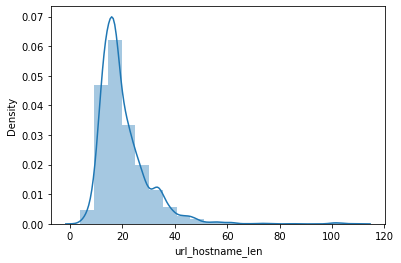

In [13]:
sns.distplot(data[var], hist=True, bins=20)
plt.show()

- url_entropy: URL 복잡도
    - 수치형 데이터

In [14]:
var = 'url_entropy'

In [15]:
data[var].isna().sum() # 결측치 없음

0

In [16]:
data[var].describe()

count    3664.000000
mean        4.228568
std         0.393055
min         2.737839
25%         3.983196
50%         4.189561
75%         4.458940
max         5.821782
Name: url_entropy, dtype: float64

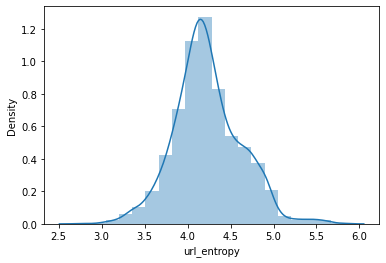

In [17]:
sns.distplot(data[var], hist=True, bins=20)
plt.show()

- url_chinese_present: URL 내 중국어 표시 여부
    - 범주형 데이터

In [18]:
var = 'url_chinese_present'

In [19]:
data[var].isna().sum() # 결측치 없음

0

In [20]:
data[var].value_counts()

0.0    3664
Name: url_chinese_present, dtype: int64

- url_ip_present: URL 내 IP 표시 여부
    - 범주형 데이터

In [21]:
var = 'url_ip_present'

In [22]:
data[var].isna().sum() # 결측치 없음

0

In [23]:
data[var].value_counts()

0.0    3441
1.0     223
Name: url_ip_present, dtype: int64

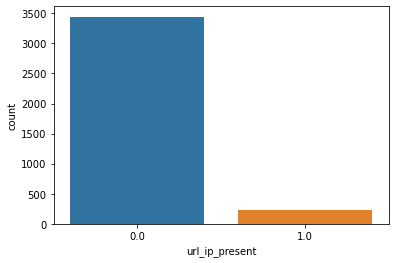

In [25]:
sns.countplot(data[var])
plt.show()

- Result_v1: 악성사이트 여부
    - 범주형 데이터

In [26]:
var = 'Result_v1'

In [27]:
data[var].isna().sum() # 결측치 없음

0

In [28]:
data[var].value_counts()

benign       1858
malicious    1806
Name: Result_v1, dtype: int64

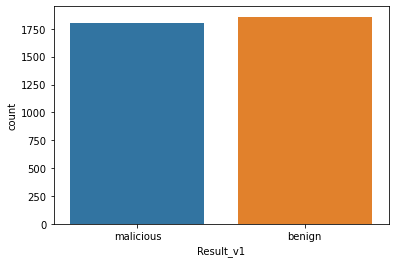

In [29]:
sns.countplot(data[var])
plt.show()

### Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [40]:
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

In [31]:
target = 'Result_v1'

- IP 주소 표시 여부 --> 악성 사이트 여부

In [32]:
feature = 'url_ip_present'

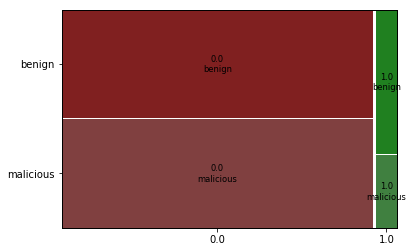

In [34]:
mosaic(data, [feature, target], gap=0.01)
plt.show()

In [50]:
tb = pd.crosstab(data[target], data[feature])
result = spst.chi2_contingency(tb)

print('카이제곱 통계량: ', result[0])
print('p-value: ', result[1])
print('자유도: ', result[2])

카이제곱 통계량:  856.9255882514055
p-value:  5.696964491859939e-138
자유도:  66


- URL domain 길이 --> 악성 사이트 여부

In [37]:
feature = 'url_domain_len'

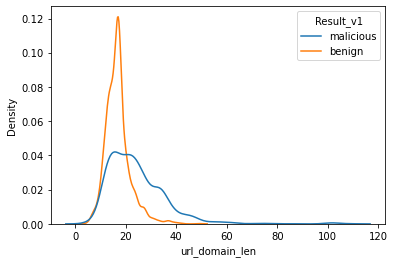

In [38]:
sns.kdeplot(x=feature, data = data, hue =target, common_norm = False)
plt.show()

In [49]:
tmp = pd.get_dummies(data, columns=[target], drop_first=True) # y값 가변수화
tmp.dropna(axis=0, inplace=True)

model = sm.Logit(tmp['Result_v1_malicious'], tmp[feature])
result = model.fit()

print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.269483
         Iterations 4
url_domain_len    3.815200e-19
dtype: float64


- URL 복잡도 --> 악성 사이트 여부

In [51]:
feature = 'url_entropy'

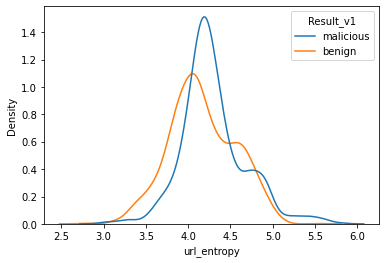

In [52]:
sns.kdeplot(x=feature, data = data, hue =target, common_norm = False)
plt.show()

In [53]:
tmp = pd.get_dummies(data, columns=[target], drop_first=True) # y값 가변수화
tmp.dropna(axis=0, inplace=True)

model = sm.Logit(tmp['Result_v1_malicious'], tmp[feature])
result = model.fit()

print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.517786
         Iterations 2
url_entropy    0.915585
dtype: float64


## Step 2. 데이터 전처리
---

### Q3. 중복 데이터 제거
- 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
- 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
- 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
- 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [54]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [67]:
# 중복 데이터 제거를 제거합니다.
data = data.drop_duplicates()

In [68]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

---

### Q4. 텍스트와 범주형 특성 처리

- 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
    - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [69]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [70]:
df_ex.replace(['NY', 'CA', 'TX'], ['NewYork', 'California', 'Texas'])

,name,age,state,point
0,Alice,24,NewYork,64
1,Bob,42,California,24
2,Charlie,18,California,70
3,Dave,68,Texas,70
4,Ellen,24,California,88
5,Frank,30,NewYork,57


[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [71]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
data['Result_v1'].unique()

array(['malicious', 'benign'], dtype=object)

In [73]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
data = data.replace(['malicious', 'benign'], [-1, 1])

In [74]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
data['Result_v1'].unique()

array([-1,  1], dtype=int64)

---

### Q5. 결측치 처리

- 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
- 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [75]:
# 결축치의 존재를 확인합니다.
data.isna().sum()

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [76]:
# 결측치를 적절히 처리해줍니다.
data.dropna(axis=0, inplace=True)

In [77]:
# 결축치의 존재를 확인합니다.
data.isna().sum()

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

---

### Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

- AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
- 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [78]:
data = data.drop('Unnamed: 0', axis=1) # 의미 없는 데이터 제거

In [85]:
data = data.drop(['url_chinese_present', "html_num_tags('applet')"], axis=1) # 한 가지 값으로만 채워진 열 제거

In [90]:
data.corr()['Result_v1']

url_len                   -0.007357
url_num_hyphens_dom       -0.354666
url_path_len               0.100681
url_domain_len            -0.379331
url_hostname_len          -0.383235
url_num_dots               0.045959
url_num_underscores        0.128536
url_query_len             -0.188576
url_num_query_para        -0.184108
url_ip_present             0.078929
url_entropy               -0.165808
url_port                   0.011060
html_num_tags('iframe')    0.021871
html_num_tags('script')    0.201222
html_num_tags('embed')     0.107671
html_num_tags('object')    0.104033
html_num_tags('div')       0.063515
html_num_tags('head')     -0.024306
html_num_tags('body')     -0.111286
html_num_tags('form')     -0.122838
html_num_tags('a')         0.121835
Result_v1                  1.000000
Name: Result_v1, dtype: float64

In [86]:
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1


In [ ]:
# target과 상관성 부족한 열 제거
data2 = data.drop(['url_len', 'url_num_dots', 'url_ip_present', 'url_port', "html_num_tags('iframe')", "html_num_tags('div')", "html_num_tags('head')"], axis=1)

In [92]:
data2.head()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,0.0,8.0,15.0,15.0,0.0,0.0,0.0,4.260333,7.0,0.0,0.0,1.0,0.0,0.0,-1
1,0.0,58.0,17.0,17.0,0.0,0.0,0.0,4.636107,18.0,0.0,0.0,1.0,0.0,21.0,1
2,0.0,4.0,16.0,16.0,0.0,0.0,0.0,3.708966,33.0,0.0,0.0,1.0,3.0,70.0,1
3,0.0,13.0,14.0,14.0,0.0,0.0,0.0,4.025592,15.0,0.0,0.0,1.0,1.0,55.0,1
4,2.0,12.0,27.0,27.0,0.0,0.0,0.0,4.631833,10.0,0.0,0.0,1.0,0.0,321.0,1


- 악성 URL: 악성 스크립트 삽입
    - 스크립트가 일반적으로 길다
    - 스크립트가 난독화 되어있는 경우가 많음

- 악성 URL: 신규 도메인 관련 악성 URL
    - 해외 단축 URL(u6.gg, u7.gg, c6.gg 등)을 이용

---

### Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

- 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
- 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
- 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x = data.drop('Result_v1', axis=1)
y = data['Result_v1']

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [99]:
print(x_train.shape)
print(x_test.shape)

(2563, 21)
(1099, 21)


In [100]:
data.to_csv('cleaned_dataset.csv')